# Instructions

Hi!

1. This is the test. You have 75 minutes to complete it and commit the final version of this file to the repo. Please treat the test and the data as confidential and do not share them.


2. I will treat the time of your last commit as the time you finished the test. The max score you can receive is 100. For every 1 minute over 75 minutes you will lose 1 point. For example, if you complete the test in 90 minutes, you will lose 15 points.

3. Feel free to use any resources available (internet, class notes, etc.), but do the test on your own. If you copy code from the internet, just add a link as a comment. It is perfectly fine to copy code as long you understand it, and don't violate any licenses.

Thanks for taking the time to take the test and good luck!

— Maciej



# Scoring

| task | max score | note     |
| ---- | --------- | -------- |
| 1    | 30        |          |
| 2    | 3         |          |
| 3    | 7         |          |
| 4    | 10        |          |
| 5    | 15        |          |
| 6    | 30        |          |
| 7    | 5         |          |
| 8    | 20        | optional |



# Task 1
**Points: 30**

Write, document, and test a function that takes three numbers and prints a string based on the following specifications.

The function should print:
- "woof" if the **first** number is divisible by the third number, 
- "meow" if the **second** number is divisible by the third number, 
- "bark" if **both the first and the second** numbers are divisible by the third number. 

If none of the first two numbers is divisible by the third number, the function should not print anything. 

All three arguments should be positive integers. Assume that they can be in the range of 1 to 1000000000. Your function should handle all numbers in this range properly.

I am including starter code below.

In [8]:
def woof_meow_bark(num_1, num_2, num_3):
    print("IN")
    str1 = ""
    # Solution
    if num_1 % num_3 == 0:
        str1 = "woof"
    elif num_2 % num_3 == 0:
        str1 = "meow"
    elif num_1 % num_3 == 0 and num_2 % num_3 == 0:
        str1 = "bark"
    else:
        str1 = ""
    
    return str1

    """

    Examples
    —--—----
    >>> woof_meow_bark(num_1=4, num_2=1, num_3=2)
    woof

    >>> woof_meow_bark(num_1=1, num_2=4, num_3=2)
    meow

    >>> woof_meow_bark(num_1=8, num_2=4, num_3=2)
    bark

    """
print(woof_meow_bark(3,4,6))

IN



# Task 2
**Points: 3**

1. Load this csv file, ideally as a pandas dataframe:

    `battery_status__2021_03_16__05__EDT.csv` (Do not use absolute paths.)

    The file contains battery level data for a single device of one study participant.
    The entries (columns) in each row are: "date_time", "x", "is_charging", "battery_level."

    If you ever need to use date_time, it is encoded in the following format. 
    
      "15-39-47-768_05-26-50_EDT" means:
      - hour:"15"
      
      - minute:"39"

      - second:"47"

      - microsecond:"768"

      - day:"26"

      - month:"5"

      - year:"2050"
    

2. Drop the "x" column. 
3. Plot battery levels over time as a line plot; add a title as well as x and y labels.
4. Do these data look correct to you?
- If yes, describe the data in two short sentences.
- If no, document the issue(s) and implement a fix that makes the most sense to you.


In [25]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True


df = pd.read_csv('battery_status__2021_03_16__05__EDT.csv')

df.head()

,date_time,x,is_charging,battery_level
0,05-00-46-176_03-16-21_EDT,2,True,83
1,05-00-48-583_03-16-21_EDT,2,True,83
2,05-01-48-599_03-16-21_EDT,2,True,84
3,05-02-28-752_03-16-21_EDT,2,True,84
4,05-02-48-599_03-16-21_EDT,2,True,84


In [26]:
# drop the X coloumn
df1 = df.drop(columns=['x'])

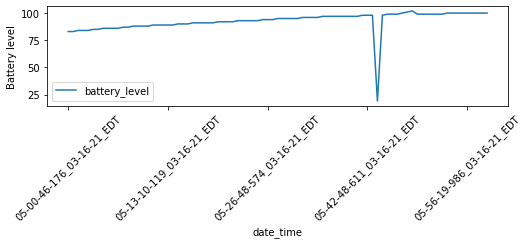

In [33]:

df1.set_index('date_time').plot()
plt.xticks(rotation=45)
plt.ylabel("Battery level")
plt.show()

In [35]:
# how many rows of data where the dip occured?
df2 = df1[df1['battery_level']<25]
df2

,date_time,is_charging,battery_level
62,05-43-48-603_03-16-21_EDT,True,19


### Does the plot look correct?

The plot definetly dosent seem right. At 05-43-43-681_03-16-21_EDT the battery level is 98, then 4 seconds later 05-43-48-603_03-16-21_EDT it dips to 19 and then 1 minute later its 05-44-48-595_03-16-21_EDT back to 98.

Since its just one entry and the number of rows with a normal reading is greater, we can drop this row as its an outlier(possibly due to a glitch in the recording sensor perhaps!)




# Task 3
**Points: 7**

Write and document a function that takes the dataframe as an argument and returns the mean battery level as a float (rounded to two decimal places)

- There is a very easy way to do it and the correct way to do it. Describe both approaches in up to four short sentences in total.

- Pick one of them and justify your choice in up to three short sentences. Implement it.

### Solution

To get the descriptive stats about the dataframe such as mean, median, percentile etc, we can use the short way of df.describe()

To get the mean for a specific column we can apply the mean() function to that coloumn  in the dataframe.

ie., df1['battery_level'].mean(axis=0) 

In [38]:
# short way
df1.describe()

,battery_level
count,85.000000
mean,92.741176
std,9.627778
min,19.000000
25%,89.000000
50%,94.000000
75%,98.000000
max,102.000000


In [39]:
# correct way
def calculate_mean_battery_level():
    val = df1['battery_level'].mean(axis=0)
    # round to 2 places
    return round(val,2)


In [37]:
print(calculate_mean_battery_level())

92.74


# Task 4
**Points: 10**

Load all csv files in this directory that start with "battery_status__".

Write and document a function that takes the dataframe as an argument and returns to total time the battery was fully charged.

In [58]:
# Load all csv files in this directory that start with "battery_status__"
import pandas
import os
import datetime

path = "./"
files = os.listdir(path) # Returns list of files in the folder which is specifed path
li = []
for file in files:
    if file.startswith("battery_status__"):# Checking wheter file starts with battery_status__
        # os.sep returns the separtor of operator system
        # exec(f"{file[:-4]} = pandas.read_csv({path}+{os.sep}+{file})")
        df = pd.read_csv(file, index_col=None, header=0)
        li.append(df)
df_concat = pd.concat(li,axis=0, ignore_index=True)

In [43]:
df_concat

,date_time,x,is_charging,battery_level
0,22-37-55-422_02-21-21_EST,2,True,89
1,22-38-45-207_02-21-21_EST,2,True,89
2,22-39-45-197_02-21-21_EST,2,True,89
3,22-40-45-211_02-21-21_EST,2,True,90
4,22-41-24-560_02-21-21_EST,2,True,89
...,...,...,...,...
65191,04-58-11-558_05-11-21_EDT,2,True,67
65192,04-58-53-229_05-11-21_EDT,2,True,67
65193,04-59-10-186_05-11-21_EDT,2,True,68
65194,04-59-32-728_05-11-21_EDT,2,True,68


In [55]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65196 entries, 0 to 65195
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date_time      65196 non-null  object
 1   x              65196 non-null  int64 
 2   is_charging    65196 non-null  bool  
 3   battery_level  65196 non-null  int64 
dtypes: bool(1), int64(2), object(1)
memory usage: 1.6+ MB


In [44]:
df2 = df_concat[df_concat['battery_level'] == 100]

In [50]:
df2

,date_time,x,is_charging,battery_level
108,01-37-12-529_02-22-21_EST,2,True,100
109,01-37-49-814_02-22-21_EST,2,True,100
110,01-37-50-935_02-22-21_EST,2,True,100
111,01-38-48-731_02-22-21_EST,2,True,100
112,01-39-40-761_02-22-21_EST,2,True,100
...,...,...,...,...
64598,12-30-06-668_05-10-21_EDT,5,True,100
64599,12-30-12-839_05-10-21_EDT,3,False,100
64600,12-30-12-856_05-10-21_EDT,3,False,100
64601,12-30-42-266_05-10-21_EDT,3,False,100


In [73]:
def calculate_total_time_fully_charged():
    # get the t1 time
    t1 = df2['date_time'].iloc[0]
    t1 = t1.split('_')[1]
    t1 = t1.split('-')
    t1 = datetime.datetime(int(t1[2]), int(t1[0]), int(t1[1]))
    # t1 = datetime.datetime.strptime(t1, '%m-%d-%Y')

    # get the t2 time
    t2 = df2['date_time'].iloc[-1]
    t2 = t2.split('_')[1]
    t2 = t2.split('-')
    t2 = datetime.datetime(int(t2[2]), int(t2[0]), int(t2[1]))
    print(t1)

    # find the time delta
    time_delta = pd.Timedelta(t2 - t1).seconds / 60.0

    return time_delta



In [74]:
print(calculate_total_time_fully_charged())

0021-02-22 00:00:00
0.0


# Task 5
**Points: 15**

Write and document a function that computes the mean time it takes the phone reach full charge (100%) within a specified date range. Remember that we are interested in time **until** reaching full charge. 

In [8]:
def calculate_mean_time_till_full_charge(start_date_inclusive, end_date_inclusive):
    """
    Calculate mean time till full charge in minutes

    Args:
    -----
        start_date_inclusive: datetime.datetime
        end_date_inclusive: datetime.datetime

    Returns:
    --------
        float: mean time till full charge in minutes
    """
    pass


# Task 6
**Points: 30**

1. Analyze the data and document your analysis. What can you learn about how this single participant uses their phone or their habits by analyzing the data? I can see at least three different aspects of the data that could be analyzed. You can pick one or more aspects. 

2. You can use any techniques you want to analyze the data, including statistical methods, ML, EDA, signal processing, etc. However, please do not using deep learning. 
 
3. Make sure sure to briefly document your analysis to help me understand what you are doing. Summarize your analysis, including a research question, and findings in a short paragraph. If appropriate, use plots to show your findings. I like plots.

4. You probably do not have much time. I much prefer something short and sweet over an incomplete or hard to follow analysis.

5. Reproducibility:
- If your analysis requires installation of any third party packages, make sure to document it and include information about how to install them. (You can include links to the relevant parts of documentation, etc.)
- Note down, what version of Python you used to conduct your analysis.
- If you'd like, you can include a requirements.txt file, as long as it runs on Windows.

### Solution

Point 1

In the battery status dataframe, the aspect of time vs battery discharge could be analysed to see the usage pattern of the user, how it was in the working hours of the weekdays verses the working hours in weekends. 
A very obscure observation, elder people tend to put their phones on charging much often even when the battery status is 80% or even 90%, meanwhile the people on the lower age group tend to have the battery drain closer to discharge point most time, as they use it often.

Point 2

We can use the df.describe to get insights related to statistical aspects of the usage pattern in the data

Point 3

For the research however many aspects of the device are unknown such as the make, model, battery capacity, processor, location etc. Such fields along with the existing battery status data can give a much more comprehensive answer about the person's phone usage details and experience.

P.S. I wish I had more time but in shortage of which this is something I could conclude.

# Task 7
**Points: 5**

Thanks for taking the time to complete the tasks! Please rate how well you did on each task, in your opinion. 
Use a 0 - 10 scale, where:
- 0 means "I haven't done it" 
- 1 means "Very poorly" 
- 5 means "Average" 
- 10 means "Excellent"


| task | max score | note     |self-review |
| ---- | --------- | -------- |----------- |
| 1    | 30        |          |            |
| 2    | 3         |          |            |
| 3    | 7         |          |            |
| 4    | 10        |          |            |
| 5    | 15        |          |            |
| 6    | 30        |          |            |
| 7    | 5         |          |            |
| 8    | 20        | optional |            |


# Task 8 (bonus, optional)

Use this task to make up for any of the previous tasks that you a hard time completing. Or use it to show off!

In this task, you will optimize an existing function.

Let's generate a list of random strings.




In [76]:
def generate_random_string_of_length_n(n: int):
    """
    Generate a random string of length n.
    """

    import random
    import string
    return ''.join(random.choices(string.ascii_uppercase + string.digits, k=n))


random_strings = [generate_random_string_of_length_n(n=5) for i in range(10)]
random_strings


['F0B5G',
 'JRLFR',
 'A84GD',
 '3LW5I',
 '2LFFF',
 'KGR4I',
 '5MOFY',
 '2SEIF',
 'M4QJ4',
 'I2LS7']

Now, let's sample 8 strings from the list twice and save the results.

In [77]:
def sample_n_random_strings(strings: list, n: int):
    """
    Sample n random strings from a list of strings.
    """
    import random
    return random.sample(strings, n)


sampled_strings_A = sample_n_random_strings(strings=random_strings, n=8)
sampled_strings_B = sample_n_random_strings(strings=random_strings, n=8)


Our job is to check, which strings in `sampled_strings_A` are in `sampled_strings_B`. So we write the below function (`approach_1`), which seems to work.

In [78]:
def approach_1(sampled_strings_A, sampled_strings_B):
    strings_in_both_lists = []
    for string_A in sampled_strings_A:
        for string_B in sampled_strings_B:
            if string_A == string_B:
                if string_A not in strings_in_both_lists:
                    strings_in_both_lists.append(string_A)
    return strings_in_both_lists


def printer(strings_in_both_lists: list, verbose=False):
    print(
        f"The number of strings in both lists is: {len(strings_in_both_lists)}.")
        
    if verbose:
        if len(strings_in_both_lists) > 0:
            print(f"These strings are:\n{strings_in_both_lists}")


printer(approach_1(sampled_strings_A, sampled_strings_B), verbose=True)


The number of strings in both lists is: 6.
These strings are:
['2LFFF', '2SEIF', 'A84GD', 'I2LS7', '5MOFY', 'F0B5G']


Sadly, our approach is really slow for larger data.

In [79]:
def make_data(random_string_of_length: int, random_strings_number: int, sample_size: int):
    """
    Returns two samples on size `sample_size` from a list of random strings.
    The strings in the list of random strings are of length `random_string_of_length` and there are `random_strings_number` of them.

    Example:
    —--—----
    make_data(random_string_of_length=100, random_strings_number=10**5, sample_size=80) is equivalent to:
        random_strings = [generate_random_string_of_length_n(n=10) for i in range(10**5)]
        sampled_strings_A = sample_n_random_strings(strings=random_strings, n=80)
        sampled_strings_B = sample_n_random_strings(strings=random_strings, n=80)

    Note:
    —--—-
    It can take a few seconds to generate the data.
    """

    import random

    random_strings = [generate_random_string_of_length_n(
        n=random_string_of_length) for i in range(random_strings_number)]
    sampled_strings_A, sampled_strings_B = sample_n_random_strings(
        strings=random_strings, n=sample_size), sample_n_random_strings(strings=random_strings, n=sample_size)

    return sampled_strings_A, sampled_strings_B


sampled_strings_A, sampled_strings_B = make_data(
    random_string_of_length=100, random_strings_number=10**5, sample_size=10**4)
    
printer(approach_1(sampled_strings_A, sampled_strings_B), verbose=False)


The number of strings in both lists is: 1008.


Let's benchmark `approach_1` on a slightly smaller dataset. On my PC, the benchmark takes about 16 seconds.

In [80]:
sampled_strings_A, sampled_strings_B = make_data(
    random_string_of_length=100, random_strings_number=10**4, sample_size=10**3)


In [81]:
% % timeit - n 100 - r 10
strings_in_both_lists = approach_1(sampled_strings_A, sampled_strings_B)


UsageError: Line magic function `%` not found.


Benchmark results on my PC: 39.7 ms ± 2.82 ms per loop (mean ± std. dev. of 10 runs, 100 loops each)

Can you optimize the performance of `approach_1`? It is pretty easy to make it run at least 300x faster. With some work, you can improve the performance even more.

Write and document a function `approach_2`, implementing your optimized algorithm. You can use the smaller dataset in development, but assume that I will use data generated using the below to test your function. It may or may not be relevant to how to you optimize the function.
`make_data(random_string_of_length=100, random_strings_number=10**6, sample_size=10**5)`

Hint: 

There are at least three optimization methods you can use and you can combine them. 
- Logic (moderate performance boost)
- Data structures (very large performance boost) 
- Popular method that gives the larger boost the larger the dataset, but may require a third party library or calling shell. 

In [82]:
def approach_2(sampled_strings_A, sampled_strings_B):
    # using the Sets to find the intersection between the two lists

    string_a_set = set(sampled_strings_A)
    string_b_set = set(sampled_strings_B)

    if (string_a_set & string_b_set):
        print(string_a_set & string_b_set)

    else:
        print("No common strings")



In [83]:
print(approach_2(sampled_strings_A, sampled_strings_B))

{'F8VERSBD7TZS9DT4D2FGJSL3WW8W7H11WRDU9F2AHSP93APRL3B2TOV87RZYY0STDEQ8IM4FWAOSC7FO69W4B8099YVIX4531A4N', 'XQV07JUEMUBH4OM2X2H22NRZCZK5HFVVSSGOZWMMO5B7UYXLW76YSBS2S3425Q2DIYU5OBEFIN6XBE4EK9PY83A7BHXBSHOWG3NN', 'JELNDEVHVUWFESS6ECQX9QYZUX6O0231ST2GURUZW03QAHO12MWSYD7H842MC26OPU4AWFD967UCEGYKXL7BOBVERZYI2DY9T79L', '642Y2YFH7A6UYZEXZCIXD9LP9CHHIYOBIZQVSFS1U0J6MQLKIL3IB14V3GDANSHSOP4CI29NB9Y7TI01RWC8NO542WVTPBYJB34J', '217P3C9RY3KY6YJIXB3S4XXHPFABT7KV2AQFTKFZYEEVUACQ5BWE6VK79GI1L4EEVPI5X4870FSLI19LP3AACWHCBLGUYRG3RA33', 'N6TB8W8U7VQUL7HSA2HC8HMKDXVVWTBGCB9C484APZA2VQ9WQGXA5SJNQM7GE2RYQ6T8QKJNTUUQMN945ZP68W3OPDZPPMZXD9H6', 'AZ1YK56D5AQUNRT9FB6ITVFHX1RMC897OCS50NHTJZ47ODX3LMJPFPM0E5Q7PFO2DH9N4Y6FHJVTOM0HXR0SHFKFKRFQDLFBBIGL', 'YUY0ZUT0EMB7Y4ZW47ASCP4491E7L0R3RJK7RO6QJA2MWCV6QC0XAJ0NXSQCG98ST8Z706UWEMW7OQSFDANXNV25Q9BKJ0CJ2DZY', 'FWBUQ00CWGQPYUKQU4OKQ7WIHESCHXT7U8LOGC7UY94S0VQT84N1BLU18WKZVFTP34W8D553K9D2FCKGQ79MPDZ1T4EOM378XPLH', '35A1LTU7CCHUB3J44H4SU66LULB7M3LDERUJIZ12EYKJPCQW2N0WXPRPOINAN8